In [149]:
from fastai.basics import *
matplotlib.rc('image', cmap='Greys')

In [150]:
train_data = pd.read_csv(Path('./titanic/train.csv'))
test_data = pd.read_csv(Path('./titanic/test.csv'))
train_data['data_type'] = 'train'
test_data['data_type'] = 'test'
full_data = pd.concat([train_data, test_data])

In [151]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  data_type    1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [152]:
full_data.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,data_type
Embarked,,,,,,,,,,,,
C,270,168,270,270,270,212,270,270,270,270,118,270
Q,123,77,123,123,123,50,123,123,123,123,5,123
S,914,644,914,914,914,782,914,914,914,913,170,914


In [153]:
full_data['Age'] = full_data['Age'].fillna(full_data['Age'].mean())
full_data['Fare'] = full_data['Fare'].fillna(full_data['Fare'].mean())
full_data['Embarked'] = full_data['Embarked'].fillna('S')


In [154]:
full_data = full_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
# full_data = full_data.dropna(how='any', subset=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])
full_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,data_type
0,0.0,3,male,22.000000,1,0,7.2500,S,train
1,1.0,1,female,38.000000,1,0,71.2833,C,train
2,1.0,3,female,26.000000,0,0,7.9250,S,train
3,1.0,1,female,35.000000,1,0,53.1000,S,train
4,0.0,3,male,35.000000,0,0,8.0500,S,train
...,...,...,...,...,...,...,...,...,...
413,NaN,3,male,29.881138,0,0,8.0500,S,test
414,NaN,1,female,39.000000,0,0,108.9000,C,test
415,NaN,3,male,38.500000,0,0,7.2500,S,test
416,NaN,3,male,29.881138,0,0,8.0500,S,test


In [155]:
print(full_data['Pclass'].unique(), full_data['Embarked'].unique())

[3 1 2] ['S' 'C' 'Q']


In [156]:
# Encode non-numeric values
full_data['pclass_1'] = np.where(full_data['Pclass'] == 1, 1, 0)
full_data['pclass_2'] = np.where(full_data['Pclass'] == 2, 1, 0)
full_data['embark_s'] = np.where(full_data['Embarked'] == 'S', 1, 0)
full_data['embark_c'] = np.where(full_data['Embarked'] == 'C', 1, 0)
full_data['male'] = np.where(full_data['Sex'] == 'male', 1, 0)
full_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,data_type,pclass_1,pclass_2,embark_s,embark_c,male
0,0.0,3,male,22.000000,1,0,7.2500,S,train,0,0,1,0,1
1,1.0,1,female,38.000000,1,0,71.2833,C,train,1,0,0,1,0
2,1.0,3,female,26.000000,0,0,7.9250,S,train,0,0,1,0,0
3,1.0,1,female,35.000000,1,0,53.1000,S,train,1,0,1,0,0
4,0.0,3,male,35.000000,0,0,8.0500,S,train,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,male,29.881138,0,0,8.0500,S,test,0,0,1,0,1
414,NaN,1,female,39.000000,0,0,108.9000,C,test,1,0,0,1,0
415,NaN,3,male,38.500000,0,0,7.2500,S,test,0,0,1,0,1
416,NaN,3,male,29.881138,0,0,8.0500,S,test,0,0,1,0,1


In [157]:
full_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,pclass_1,pclass_2,embark_s,embark_c,male
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.246753,0.211612,0.699771,0.206264,0.644003
std,0.486592,0.837836,12.883193,1.041658,0.865560,51.738879,0.431287,0.408607,0.458533,0.404777,0.478997
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.881138,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
# Constrain values
full_data['age_n'] = full_data['Age'] / full_data['Age'].max()
full_data['fare_log'] = np.log10(full_data['Fare'] + 1)
full_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,data_type,pclass_1,pclass_2,embark_s,embark_c,male,age_n,fare_log
0,0.0,3,male,22.000000,1,0,7.2500,S,train,0,0,1,0,1,0.275000,0.916454
1,1.0,1,female,38.000000,1,0,71.2833,C,train,1,0,0,1,0,0.475000,1.859038
2,1.0,3,female,26.000000,0,0,7.9250,S,train,0,0,1,0,0,0.325000,0.950608
3,1.0,1,female,35.000000,1,0,53.1000,S,train,1,0,1,0,0,0.437500,1.733197
4,0.0,3,male,35.000000,0,0,8.0500,S,train,0,0,1,0,1,0.437500,0.956649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,male,29.881138,0,0,8.0500,S,test,0,0,1,0,1,0.373514,0.956649
414,NaN,1,female,39.000000,0,0,108.9000,C,test,1,0,0,1,0,0.487500,2.040998
415,NaN,3,male,38.500000,0,0,7.2500,S,test,0,0,1,0,1,0.481250,0.916454
416,NaN,3,male,29.881138,0,0,8.0500,S,test,0,0,1,0,1,0.373514,0.956649


In [159]:
train_data = full_data[full_data['data_type'] == 'train']
test_data = full_data[full_data['data_type'] == 'test']
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,data_type,pclass_1,pclass_2,embark_s,embark_c,male,age_n,fare_log
0,0.0,3,male,22.000000,1,0,7.2500,S,train,0,0,1,0,1,0.275000,0.916454
1,1.0,1,female,38.000000,1,0,71.2833,C,train,1,0,0,1,0,0.475000,1.859038
2,1.0,3,female,26.000000,0,0,7.9250,S,train,0,0,1,0,0,0.325000,0.950608
3,1.0,1,female,35.000000,1,0,53.1000,S,train,1,0,1,0,0,0.437500,1.733197
4,0.0,3,male,35.000000,0,0,8.0500,S,train,0,0,1,0,1,0.437500,0.956649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,male,27.000000,0,0,13.0000,S,train,0,1,1,0,1,0.337500,1.146128
887,1.0,1,female,19.000000,0,0,30.0000,S,train,1,0,1,0,0,0.237500,1.491362
888,0.0,3,female,29.881138,1,2,23.4500,S,train,0,0,1,0,0,0.373514,1.388279
889,1.0,1,male,26.000000,0,0,30.0000,C,train,1,0,0,1,1,0.325000,1.491362


In [160]:
# feature_cols = ['SibSp', 'Parch', 'pclass_1', 'pclass_2', 'embark_s',
#                 'embark_c', 'male', 'age_n', 'fare_log']
feature_cols = ['male', 'age_n', 'fare_log']
x_train = torch.from_numpy(
    train_data[feature_cols].to_numpy()).float()
x_train

tensor([[1.0000, 0.2750, 0.9165],
        [0.0000, 0.4750, 1.8590],
        [0.0000, 0.3250, 0.9506],
        ...,
        [0.0000, 0.3735, 1.3883],
        [1.0000, 0.3250, 1.4914],
        [1.0000, 0.4000, 0.9420]])

In [161]:
y_train = torch.from_numpy(train_data['Survived'].to_numpy()).float()
y_train

tensor([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
        0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
        1., 0., 1., 0., 1., 0., 0., 0., 

In [162]:
len(x_train), len(y_train)

(891, 891)

In [163]:
dataset = list(zip(x_train, y_train))
dataset[:3], len(dataset)

([(tensor([1.0000, 0.2750, 0.9165]), tensor(0.)),
  (tensor([0.0000, 0.4750, 1.8590]), tensor(1.)),
  (tensor([0.0000, 0.3250, 0.9506]), tensor(1.))],
 891)

In [164]:
training_num, validation_num = math.floor(0.9 * len(dataset)), math.floor(0.1 * len(dataset))
training_num = training_num + (len(dataset) - (training_num + validation_num))

dataset_training, dataset_validation = torch.utils.data.random_split(
    dataset, 
    [training_num, validation_num],
    generator=torch.Generator().manual_seed(42)
)

list(dataset_training)[:2], list(dataset_validation)[:2]

([(tensor([0.0000, 0.3735, 1.1255]), tensor(1.)),
  (tensor([1.0000, 0.3735, 0.9414]), tensor(0.))],
 [(tensor([1.0000, 0.2750, 0.9165]), tensor(0.)),
  (tensor([1.0000, 0.0250, 1.3439]), tensor(0.))])

In [165]:
# data_loader_training = DataLoader(dataset_training, batch_size=len(dataset_training))
# data_loader_validation = DataLoader(dataset_validation, batch_size=len(dataset_validation))
data_loader_training = DataLoader(dataset_training, batch_size=math.floor(len(dataset_training)/10))
data_loader_validation = DataLoader(dataset_validation, batch_size=math.floor(len(dataset_validation)/10))

Final accuracy: 0.8229


Text(0, 0.5, 'Accuracy')

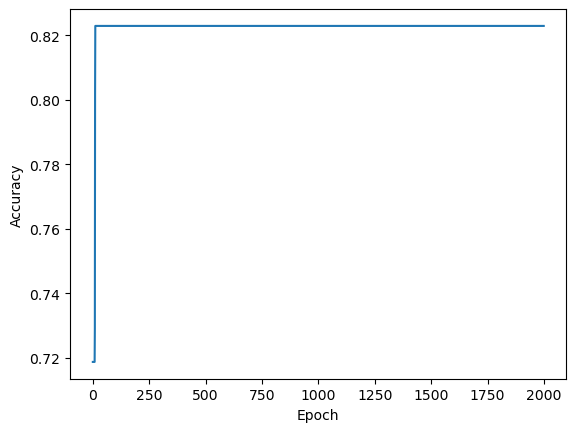

In [123]:
def init_params(size):
    return torch.randn(size, requires_grad=True)

weights = init_params(len(feature_cols))
bias = init_params(1)

linear_model = nn.Linear(len(feature_cols), 1)
def linear_model(xb: Tensor):
    return xb@weights + bias

def titanic_loss(predictions: Tensor, targets: Tensor):
    predictions = predictions.sigmoid()
    return torch.where(targets == 1, 1 - predictions, predictions).mean()
    # return ((predictions - targets)**2).mean()

def calc_grad(xb: Tensor, yb: Tensor, model: Callable[[Tensor], Tensor]):
    predictions = model(xb)
    loss = titanic_loss(predictions, yb)
    loss.backward()

def train_epoch(
    model: Callable[[Tensor], Tensor],
    learning_rate: float,
    params
):
    for xb, yb in data_loader_training:
        calc_grad(xb, yb, model)
        for param in params:
            param.data -= param.grad * learning_rate
            param.grad.zero_()

def batch_accuracy(xb: Tensor, yb: Tensor):
    predictions = xb.sigmoid()
    correct = (predictions > 0.5).float() == yb
    return correct.float().mean()

def validate_epoch(model: Callable[[Tensor], Tensor]):
    accuracies = [batch_accuracy(model(xb), yb) for xb, yb in data_loader_validation]
    return round(torch.stack(accuracies).mean().item(), 4)

accuracies = []

def train_model(model, epochs):
    for epoch in range(epochs):
        params = weights, bias
        train_epoch(model, 1., params)
        # train_epoch(model, 0.1, model.parameters())
        accuracy = validate_epoch(model)
        accuracies.append(accuracy)
        # print(accuracy, end=' ')

train_model(linear_model, 2000)
print(f"Final accuracy: {accuracies[-1]}")
# print(f"Final loss: {learn.recorder.values[-1][1]}")
plt.plot(range(len(accuracies)), accuracies)
# plt.plot(range(len(learn.recorder.values)), array(learn.recorder.values)[:, 1:2])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Final accuracy: 0.642


Text(0, 0.5, 'Accuracy')

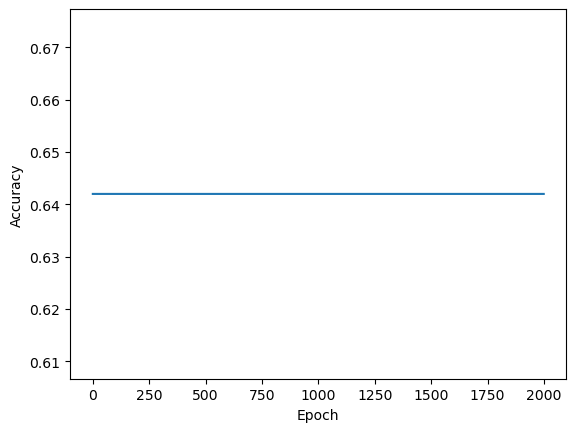

In [166]:
# Neural net version

def init_params(size):
    return torch.randn(size, requires_grad=True)

hidden_neurons = 100
# Hidden layer weights/bias
w1 = init_params((len(feature_cols), hidden_neurons))
b1 = init_params(hidden_neurons)
# Ouput weights/bias
w2 = init_params((hidden_neurons, 1))
b2 = init_params(1)

def simple_net(xb: Tensor):
    # Hidden Layer 1 linear function
    res = xb@w1 + b1
    # Hidden Layer 1 nonlinear activation function
    res = res.max(tensor(0.))
    # Ouput layer linear function
    res = res@w2 + b2
    return res

def titanic_loss(predictions: Tensor, targets: Tensor):
    predictions = predictions.sigmoid()
    return torch.where(targets == 1, 1 - predictions, predictions).mean()
    # return ((predictions - targets)**2).mean()

def calc_grad(xb: Tensor, yb: Tensor, model: Callable[[Tensor], Tensor]):
    predictions = model(xb)
    loss = titanic_loss(predictions, yb)
    loss.backward()

def train_epoch(
    model: Callable[[Tensor], Tensor],
    learning_rate: float,
    params
):
    for xb, yb in data_loader_training:
        calc_grad(xb, yb, model)
        for param in params:
            param.data -= param.grad * learning_rate
            param.grad.zero_()

def batch_accuracy(xb: Tensor, yb: Tensor):
    predictions = xb.sigmoid()
    correct = (predictions > 0.5).float() == yb
    return correct.float().mean()

def validate_epoch(model: Callable[[Tensor], Tensor]):
    accuracies = [batch_accuracy(model(xb), yb) for xb, yb in data_loader_validation]
    return round(torch.stack(accuracies).mean().item(), 4)

accuracies = []

def train_model(model, epochs):
    for epoch in range(epochs):
        params = w1, b1, w2, b2
        train_epoch(model, 1., params)
        # train_epoch(model, 0.1, model.parameters())
        accuracy = validate_epoch(model)
        accuracies.append(accuracy)
        # print(accuracy, end=' ')

# train_model(linear_model, 2000)
train_model(simple_net, 2000)
print(f"Final accuracy: {accuracies[-1]}")
# print(f"Final loss: {learn.recorder.values[-1][1]}")
plt.plot(range(len(accuracies)), accuracies)
# plt.plot(range(len(learn.recorder.values)), array(learn.recorder.values)[:, 1:2])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Final accuracy: 0.6072319149971008
Final loss: 0.40701982378959656


Text(0, 0.5, 'Accuracy')

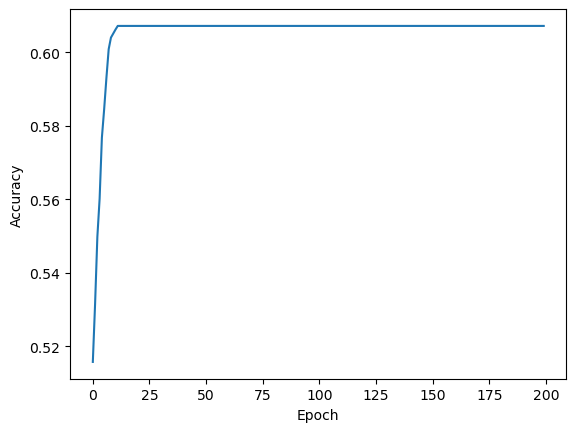

In [167]:
def titanic_loss(predictions: Tensor, targets: Tensor):
    # predictions = predictions.sigmoid()
    return torch.where(targets == 1, 1 - predictions, predictions).mean()
    # return ((predictions - targets)**2).mean()

def batch_accuracy(xb: Tensor, yb: Tensor):
    # predictions = xb.sigmoid()
    correct = (xb > 0.5).float() == yb
    return correct.float().mean()

hidden_neurons = 100
learn = Learner(
    DataLoaders(data_loader_training, data_loader_validation),
    # nn.Linear(len(feature_cols), 1),
    nn.Sequential(
        nn.Linear(len(feature_cols), 1),
        # nn.ReLU(),
        # nn.Linear(hidden_neurons, 1),
        nn.Sigmoid()
    ),
    opt_func=SGD,
    loss_func=titanic_loss,
    metrics=batch_accuracy
)

with learn.no_logging():
    learn.fit(n_epoch=200, lr=0.01)

print(f"Final accuracy: {learn.recorder.values[-1][2]}")
print(f"Final loss: {learn.recorder.values[-1][1]}")
plt.plot(range(len(learn.recorder.values)), array(learn.recorder.values)[:, 2:])
# plt.plot(range(len(learn.recorder.values)), array(learn.recorder.values)[:, 1:2])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [81]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)
path

Path('C:/Users/Danny/.fastai/data/adult_sample')

In [120]:
from fastai.tabular.all import *

path = Path('./titanic')

dls = TabularDataLoaders.from_csv(path.joinpath('train.csv'), path=path,
    y_names="Survived",
    cat_names = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'],
    # cat_names = ['Pclass', 'Sex'],
    cont_names = ['Age', 'Fare'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.449410,0.345815,0.623595,00:00
1,0.363358,0.319333,0.623595,00:00
2,0.321195,0.319761,0.623595,00:00
